# Calidad de los datos para tabla Players

## 0. Librerias

In [330]:
import sqlite3
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Extraccion de los datos

In [331]:
tabla = 'Player_Attributes'

In [332]:
conn = sqlite3.connect('database.sqlite')
data = pd.read_sql_query(f"SELECT * FROM {tabla}", conn)

In [333]:
data.shape

(183978, 42)

In [334]:
data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [335]:
data.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

## 1.1. Columnas numericas 

In [336]:
#number_cols = data.dtypes[(data.dtypes == np.int64) | (data.dtypes == np.float64)].index
integer_cols = data.select_dtypes(include = ['int']).columns
float_cols = data.select_dtypes(include = ['float']).columns

number_cols = data.select_dtypes(include = ['int','float']).columns
number_cols 

Index(['id', 'player_fifa_api_id', 'player_api_id', 'overall_rating',
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [337]:
data[number_cols].describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


## 1.2. Columnas categoricas 

In [338]:
#non_number_cols = data.columns.difference(number_cols) 
#non_number_cols = data.dtypes[(data.dtypes != np.int64) & (data.dtypes != np.float64)].index 

object_cols = data.select_dtypes(include = ['object']).columns
boolean_cols = data.select_dtypes(include = ['bool']).columns
date_cols = data.select_dtypes(include = ['datetime64']).columns

non_number_cols = data.select_dtypes(include = ['object','bool','datetime64']).columns
non_number_cols

Index(['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [339]:
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors = 'coerce')
    data[date_cols].head(3)

In [340]:
from pandas.api.types import (
    is_object_dtype,
    is_bool_dtype,
    is_datetime64_any_dtype
)

object_cols  = [c for c in data.columns if is_object_dtype(data[c])]                 # Solo object
boolean_cols = [c for c in data.columns if is_bool_dtype(data[c])]                   # Solo bool
date_cols    = [c for c in data.columns if is_datetime64_any_dtype(data[c])] 

non_number_cols = data.select_dtypes(include = ['object','bool','datetime64']).columns
non_number_cols

Index(['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [341]:
date_cols

[]

In [342]:
data["date"] = pd.to_datetime(data["date"], errors = 'coerce')

data["date"].head()

0   2016-02-18
1   2015-11-19
2   2015-09-21
3   2015-03-20
4   2007-02-22
Name: date, dtype: datetime64[ns]

In [343]:
data[non_number_cols].head()

,date,preferred_foot,attacking_work_rate,defensive_work_rate
0,2016-02-18,right,medium,medium
1,2015-11-19,right,medium,medium
2,2015-09-21,right,medium,medium
3,2015-03-20,right,medium,medium
4,2007-02-22,right,medium,medium


## 1.3 Correlacion

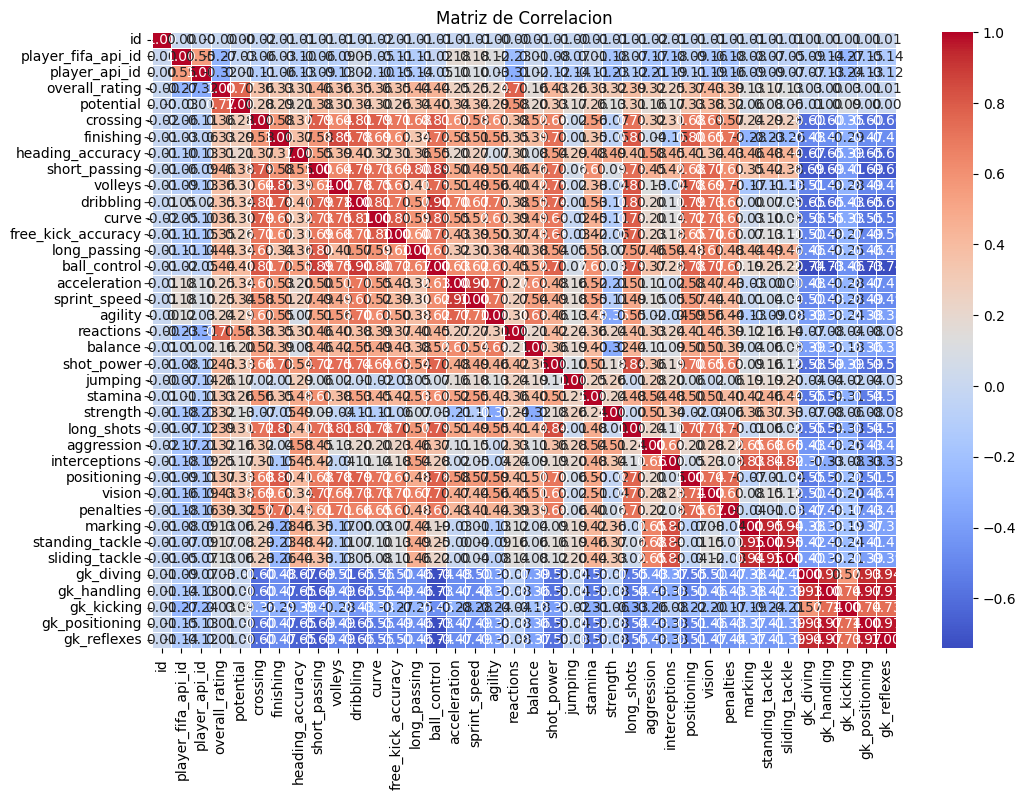

In [344]:
import numpy as np

matriz_correlaciones = data[number_cols].corr()

mask = np.triu(np.ones_like(matriz_correlaciones, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, mask=None, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlacion")
plt.show()

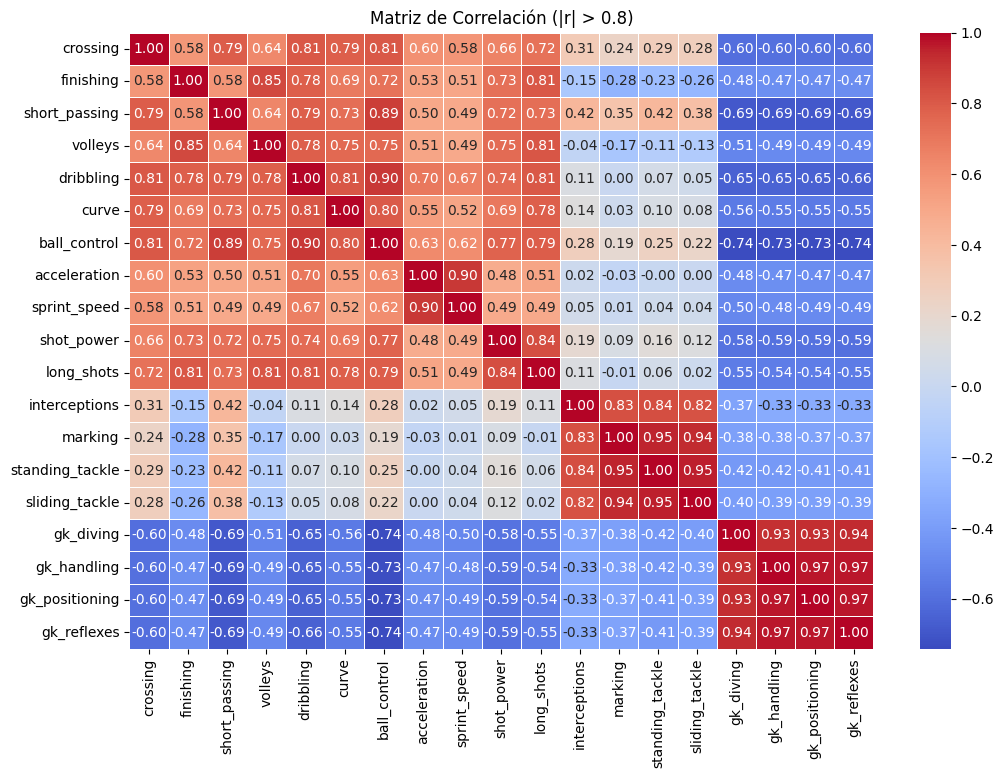

In [345]:
# Seleccionar pares con correlación fuerte (mayor a 0.8 y menor a 1 para evitar la diagonal)
umbral = 0.8
mask_fuerte = (matriz_correlaciones.abs() > umbral) & (matriz_correlaciones.abs() < 1)

# Variables que cumplen la condición
vars_fuerte = mask_fuerte.any(axis=1)
vars_seleccionadas = matriz_correlaciones.columns[vars_fuerte]

matriz_filtrada = matriz_correlaciones.loc[vars_seleccionadas, vars_seleccionadas]

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_filtrada, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación (|r| > 0.8)")
plt.show()


In [346]:
data.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [347]:
corr_pairs = (
    matriz_correlaciones.where(np.triu(np.ones(matriz_correlaciones.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ["Variable_1", "Variable_2", "Correlación"]

# Filtrar por el umbral
corr_filtradas = corr_pairs[corr_pairs["Correlación"] > umbral].sort_values(by="Correlación", ascending=False)

corr_filtradas

,Variable_1,Variable_2,Correlación
702,gk_positioning,gk_reflexes,0.966711
699,gk_handling,gk_reflexes,0.966326
698,gk_handling,gk_positioning,0.966301
682,standing_tackle,sliding_tackle,0.953104
675,marking,standing_tackle,0.950134
676,marking,sliding_tackle,0.937534
696,gk_diving,gk_reflexes,0.935209
695,gk_diving,gk_positioning,0.926366
693,gk_diving,gk_handling,0.925160
450,acceleration,sprint_speed,0.904487


# 2. Calidad de los datos

In [348]:
data_t = data.copy()
data_t.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## 2.1. Completitud

In [349]:
data_t.isnull().sum().sort_values(ascending=False).head(10)

attacking_work_rate    3230
volleys                2713
agility                2713
sliding_tackle         2713
vision                 2713
jumping                2713
curve                  2713
balance                2713
defensive_work_rate     836
potential               836
dtype: int64

In [350]:
print("Porcentage nulos por columna: ")
(100* data_t.isnull().sum()/data_t.shape[0]).sort_values(ascending=False).head(10)

Porcentage nulos por columna: 


attacking_work_rate    1.755645
volleys                1.474633
agility                1.474633
sliding_tackle         1.474633
vision                 1.474633
jumping                1.474633
curve                  1.474633
balance                1.474633
defensive_work_rate    0.454402
potential              0.454402
dtype: float64

In [351]:
print("Numero de reguistros por cada proporcion de nulos:")
(data_t.isnull().sum(axis=1) / data_t.shape[1]).value_counts().head()



Numero de reguistros por cada proporcion de nulos:


0.000000    180354
0.190476      1483
0.023810       911
0.904762       836
0.166667       394
Name: count, dtype: int64

In [352]:
num_filas_con_nulos = data_t.isnull().any(axis=1).sum()
print(f"Número de registros con al menos un nulo: {num_filas_con_nulos}")


Número de registros con al menos un nulo: 3624


In [353]:
porcentaje_filas_con_nulos = (data_t.isnull().any(axis=1).sum()/data_t.shape[0]) * 100
print(f"Porcentaje de registros con al menos un nulo: {porcentaje_filas_con_nulos:.2f}%")

Porcentaje de registros con al menos un nulo: 1.97%


In [354]:
cols_con_nulos = data_t.columns[data_t.isnull().any()]
print(cols_con_nulos)
print({f"Columnas en total: {data_t.shape[1]}"})
print({f"Columnas con nulos: {cols_con_nulos.shape[0]}"})


Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')
{'Columnas en total: 42'}
{'Columnas con nulos: 38'}


In [355]:
data_t = data_t.dropna()

In [356]:
for col in number_cols:
    data_t[col].fillna(data_t[col].mean())

In [357]:
data_t.isnull().sum().sort_values(ascending=False).head()

id                    0
player_fifa_api_id    0
player_api_id         0
date                  0
overall_rating        0
dtype: int64

## 2.2. Unicidad

In [358]:
for col in non_number_cols:
    num_duplicated = data_t.duplicated(subset = col).sum()
    print(f"{col}: {num_duplicated}")

date: 180157
preferred_foot: 180352
attacking_work_rate: 180346
defensive_work_rate: 180336


In [359]:
data_t.duplicated(keep=False).sum()

np.int64(0)

In [360]:
data_t.loc[data_t.duplicated(keep=False)]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes


In [361]:
cols = [c for c in data_t.columns if c != "id"]
dup_mask = data_t.duplicated(subset=cols, keep=False)
duplicados = data_t[dup_mask].sort_values(by=cols)
duplicados


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes


In [362]:
for col in number_cols:
    num_duplicated = data_t.duplicated(subset = [col]).sum()
    print(f"Valores duplicados para la columna {col}: {num_duplicated}")

Valores duplicados para la columna id: 0
Valores duplicados para la columna player_fifa_api_id: 169944
Valores duplicados para la columna player_api_id: 169944
Valores duplicados para la columna overall_rating: 180293
Valores duplicados para la columna potential: 180298
Valores duplicados para la columna crossing: 180259
Valores duplicados para la columna finishing: 180257
Valores duplicados para la columna heading_accuracy: 180258
Valores duplicados para la columna short_passing: 180259
Valores duplicados para la columna volleys: 180261
Valores duplicados para la columna dribbling: 180257
Valores duplicados para la columna curve: 180262
Valores duplicados para la columna free_kick_accuracy: 180257
Valores duplicados para la columna long_passing: 180259
Valores duplicados para la columna ball_control: 180261
Valores duplicados para la columna acceleration: 180268
Valores duplicados para la columna sprint_speed: 180269
Valores duplicados para la columna agility: 180273
Valores duplicado

In [363]:
print(f"Porcentage de duplicados: {data_t.duplicated(keep=False).sum() / data.shape[0] * 100:.2f}%")

Porcentage de duplicados: 0.00%


In [364]:
data_t.drop_duplicates(keep = 'first', inplace = True)

In [365]:
data_t.duplicated(keep=False).sum()

np.int64(0)

## 2.3. Consistencia

In [368]:
for col in object_cols:
    print(f"Value counts for column: {col}")
    print(data.value_counts(col))
    print("\n")

Value counts for column: date
date
2007-02-22    11794
2013-09-20     6543
2011-08-30     6525
2015-09-21     6522
2012-08-31     6495
              ...  
2014-11-26        6
2015-09-10        5
2015-09-01        5
2014-07-20        1
2016-02-13        1
Name: count, Length: 197, dtype: int64


Value counts for column: preferred_foot
preferred_foot
right    138409
left      44733
Name: count, dtype: int64


Value counts for column: attacking_work_rate
attacking_work_rate
medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: count, dtype: int64


Value counts for column: defensive_work_rate
defensive_work_rate
medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky 

In [369]:
data_t.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## 2.4. Validez

In [370]:
data.dtypes

id                              int64
player_fifa_api_id              int64
player_api_id                   int64
date                   datetime64[ns]
overall_rating                float64
potential                     float64
preferred_foot                 object
attacking_work_rate            object
defensive_work_rate            object
crossing                      float64
finishing                     float64
heading_accuracy              float64
short_passing                 float64
volleys                       float64
dribbling                     float64
curve                         float64
free_kick_accuracy            float64
long_passing                  float64
ball_control                  float64
acceleration                  float64
sprint_speed                  float64
agility                       float64
reactions                     float64
balance                       float64
shot_power                    float64
jumping                       float64
stamina     

In [371]:
data.value_counts("defensive_work_rate")

defensive_work_rate
medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: count, dtype: int64